<div align = 'right' ><h5>Name : Shubham Narandekar</h5></div>
<div align = 'right' ><h5>Student Id : 20200132</h5></div>

# Convolutional Neural Network for Pneumonia detection using chest X-Ray images

In [1]:
import os
import numpy as np
import pandas as pd
import torch
import random
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import matplotlib.pyplot as plt
import seaborn as sns
from sample_data import Models
from sklearn import metrics

In [2]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
#Transforms
transformer=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

In [4]:
test_path='/content/drive/MyDrive/Colab Notebooks/chest_xray/test'

test = torchvision.datasets.ImageFolder(test_path,transform=transformer)

Models.seed()
test_loader=DataLoader(
    test, shuffle=True
)

In [5]:
test_count=len(test)
print(test_count)

624


After training of all the models, I have saved the model that was performing best among all the epochs. In this notebook I will just load these models and evaluate their performance on unseen test data. First, I will evaluate the proposed model and vgg16 which used the baseline approach. After that I will evaluate the proposed model and vgg16 model which used the improved approach. At the end of this notebook I will compare the performance of the baseline approach with the improved approach.

### Evaluating my basic model

 Test Accuracy:  66.02564102564102
 ROC AUC:  0.5564102564102564
 PR AUC:  0.821435676392573
 Classification report: 
              precision    recall  f1-score   support

      Normal       0.75      0.14      0.24       234
   Pneumonia       0.65      0.97      0.78       390

    accuracy                           0.66       624
   macro avg       0.70      0.56      0.51       624
weighted avg       0.69      0.66      0.58       624



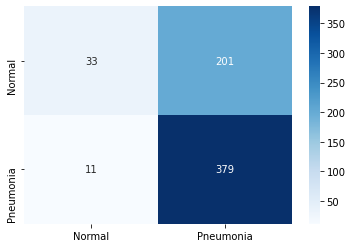

In [6]:
model = Models.cnn()
model.to(device)
v1_roc, v1_test_accuracy, v1_pr, v1_cm, v1_cr = Models.test(model, device, test_loader, test_count,
                                                               'proposed_v1_checkpoint.model')      

print(' Test Accuracy: ', v1_test_accuracy*100)
print(' ROC AUC: ', v1_roc)
print(' PR AUC: ', v1_pr)
print(' Classification report: ')
print(v1_cr)
sns.heatmap(v1_cm, annot=True, fmt='.4g', xticklabels=['Normal', 'Pneumonia'],
            yticklabels=['Normal', 'Pneumonia'], cmap='Blues')

### Basic VGG16 evaluation

 Test Accuracy:  81.57051282051282
 ROC AUC:  0.755128205128205
 PR AUC:  0.8861991512463679
 Classification report: 
              precision    recall  f1-score   support

      Normal       0.99      0.51      0.68       234
   Pneumonia       0.77      1.00      0.87       390

    accuracy                           0.82       624
   macro avg       0.88      0.76      0.77       624
weighted avg       0.86      0.82      0.80       624



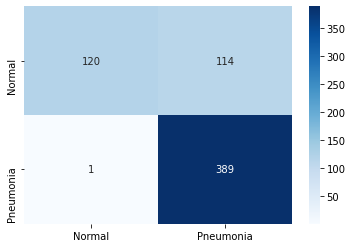

In [7]:
model2 = torchvision.models.vgg16(pretrained=True)
# freeze the model layer
for param in model2.parameters():
    param.requires_grad = False

# add Linear classifier layer
in_features = model2.classifier[0].in_features
classifier = nn.Sequential(
    nn.Linear(in_features, 2)
)
model2.classifier = classifier
model2.to(device)

vgg_roc, vgg_test_accuracy, vgg_pr, vgg_cm, vgg_cr = Models.test(model2, device, test_loader, test_count,
                                                               'vgg16_v1_checkpoint.model')      

print(' Test Accuracy: ', vgg_test_accuracy*100)
print(' ROC AUC: ', vgg_roc)
print(' PR AUC: ', vgg_pr)
print(' Classification report: ')
print(vgg_cr)
sns.heatmap(vgg_cm, annot=True, fmt='.4g', xticklabels=['Normal', 'Pneumonia'],
            yticklabels=['Normal', 'Pneumonia'], cmap='Blues')

### Evaluating after improving my model.

 Test Accuracy:  86.85897435897436
 ROC AUC:  0.8367521367521368
 PR AUC:  0.9166926541926542
 Classification report: 
              precision    recall  f1-score   support

      Normal       0.92      0.71      0.80       234
   Pneumonia       0.85      0.96      0.90       390

    accuracy                           0.87       624
   macro avg       0.88      0.84      0.85       624
weighted avg       0.88      0.87      0.86       624



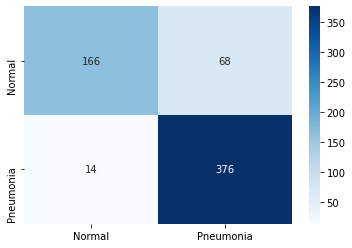

In [8]:
model3 = Models.cnn2()
model3.to(device)

v2_roc, v2_test_accuracy, v2_pr, v2_cm, v2_cr = Models.test(model3, device, test_loader, test_count,
                                                               'proposed_v2_checkpoint.model')      

print(' Test Accuracy: ', v2_test_accuracy*100)
print(' ROC AUC: ', v2_roc)
print(' PR AUC: ', v2_pr)
print(' Classification report: ')
print(v2_cr)
sns.heatmap(v2_cm, annot=True, fmt='.4g', xticklabels=['Normal', 'Pneumonia'],
            yticklabels=['Normal', 'Pneumonia'], cmap='Blues')

### Evaluating VGG16 after transfer learning

 Test Accuracy:  89.26282051282051
 ROC AUC:  0.8705128205128205
 PR AUC:  0.9323076923076923
 Classification report: 
              precision    recall  f1-score   support

      Normal       0.92      0.78      0.85       234
   Pneumonia       0.88      0.96      0.92       390

    accuracy                           0.89       624
   macro avg       0.90      0.87      0.88       624
weighted avg       0.89      0.89      0.89       624



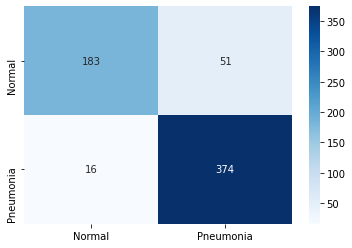

In [9]:
model4 = torchvision.models.vgg16(pretrained=True)

for param in model4.parameters():
    param.requires_grad = False


in_features = model4.classifier[0].in_features
classifier = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(in_features, 256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 2)
)
model4.classifier = classifier
model4.to(device)

vggv2_roc, vggv2_test_accuracy, vggv2_pr, vggv2_cm, vggv2_cr = Models.test(model4, device, test_loader, test_count,
                                                               'vgg16_v2_checkpoint.model')      

print(' Test Accuracy: ', vggv2_test_accuracy*100)
print(' ROC AUC: ', vggv2_roc)
print(' PR AUC: ', vggv2_pr)
print(' Classification report: ')
print(vggv2_cr)
sns.heatmap(vggv2_cm, annot=True, fmt='.4g', xticklabels=['Normal', 'Pneumonia'],
            yticklabels=['Normal', 'Pneumonia'], cmap='Blues')

### Test Results

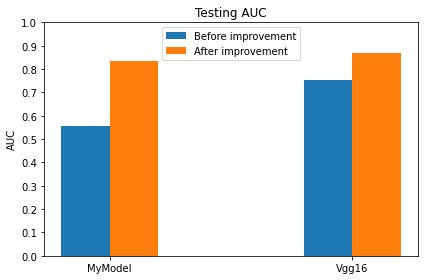

 MyModel before:  0.5564102564102564
 MyModel after:  0.8367521367521368
 Vgg16 before:  0.755128205128205
 Vgg16 after:  0.8705128205128205


In [10]:
labels = ['MyModel', 'Vgg16']
after = [v2_roc,vggv2_roc]
before = [v1_roc,vgg_roc]

x = np.arange(len(labels)) 
width = 0.20  

fig, ax = plt.subplots(figsize=(6,4))
rects1 = ax.bar(x - width/2, before, width, label='Before improvement')
rects2 = ax.bar(x + width/2, after, width, label='After improvement')

ax.set_ylabel('AUC')
ax.set_title('Testing AUC')
ax.set_xticks(x)
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_xticklabels(labels)
ax.legend(loc='upper center')
fig.tight_layout()
plt.show()

print(' MyModel before: ', v1_roc)
print(' MyModel after: ', v2_roc)
print(' Vgg16 before: ', vgg_roc)
print(' Vgg16 after: ', vggv2_roc)

From the above graph we can see that earlier the proposed model had an ROC AUC score of 0.55 on test data which very less than the training AUC score which was 0.96 and the vgg16 model had an AUC score of 0.75 on test data which is also less than the training AUC score which was 0.94. So both the models are clearly overfitting in this case. After improving both the models, proposed model had an AUC score of 0.83 and vgg16 had an AUC score of 0.87 thus indicating that the models are now performing very well.

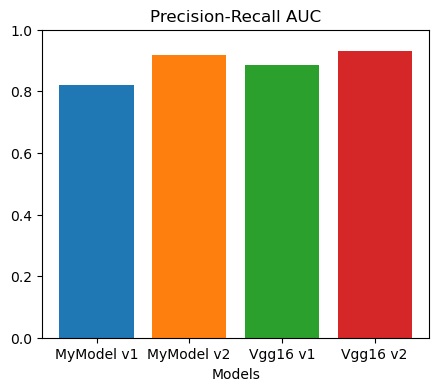

 MyModel before:  0.821435676392573
 MyModel after:  0.9166926541926542
 Vgg16 before:  0.8861991512463679
 Vgg16 after:  0.9323076923076923


In [11]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(5,4))

models = ('MyModel v1', 'MyModel v2', 'Vgg16 v1', 'Vgg16 v2')
ax.bar('v1', v1_pr, align='center')
ax.bar('v2', v2_pr, align='center')
ax.bar('vggv1', vgg_pr, align='center')
ax.bar('vggv2', vggv2_pr, align='center')
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_xticklabels(models)
ax.set_xlabel('Models')
ax.set_title('Precision-Recall AUC')
plt.show()

print(' MyModel before: ', v1_pr)
print(' MyModel after: ', v2_pr)
print(' Vgg16 before: ', vgg_pr)
print(' Vgg16 after: ', vggv2_pr)

So the above Precision-Recall AUC scores clearly indicates how the performance of the models increased after improvements.